In [ ]:
import pandas as pd


df = pd.read_csv('/content/testdataset3.csv')

# Function to categorize headings based on keywords
def categorize_heading(heading):
    keywords = {
        "murder": ["kill", "murder", "death", "burned alive","killed"],
        "robbery": ["theft", "rob", "heist", "raid","stealing","flee"],
        "stalking": ["stalking", "stalked", "followed"],
        "accident": ["accident", "crash", "collision", "ran over"],
        "kidnapping": ["kidnapping", "abducted", "abduction"],
         "harassment": ["harassment", "sexual harassment", "assault", "molestation", "raped", "sextort","raping"],
          "Domestic Violence": ["chops"],
         "Fraud":["fraud","cheats"],
         "Suicide":["suicide"],
         "Financial scam":["scam","cheating"]
    }
    for category, words in keywords.items():
        for word in words:
            if word in heading.lower():
                return category
    return "other"  # If no category match is found

# Apply categorization function to each heading
df['category'] = df['heading'].apply(categorize_heading)

# Print the count of headings in each category
print(df['category'].value_counts())
df.to_csv('updated_dataset.csv', index=False)

category
murder               15
other                14
robbery               9
harassment            6
Fraud                 3
Financial scam        2
stalking              1
Domestic Violence     1
kidnapping            1
Suicide               1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  harassment       0.00      0.00      0.00         2
  kidnapping       0.00      0.00      0.00         1
      murder       0.50      0.67      0.57         3
       other       0.60      1.00      0.75         3
     robbery       1.00      1.00      1.00         2

    accuracy                           0.64        11
   macro avg       0.42      0.53      0.46        11
weighted avg       0.48      0.64      0.54        11



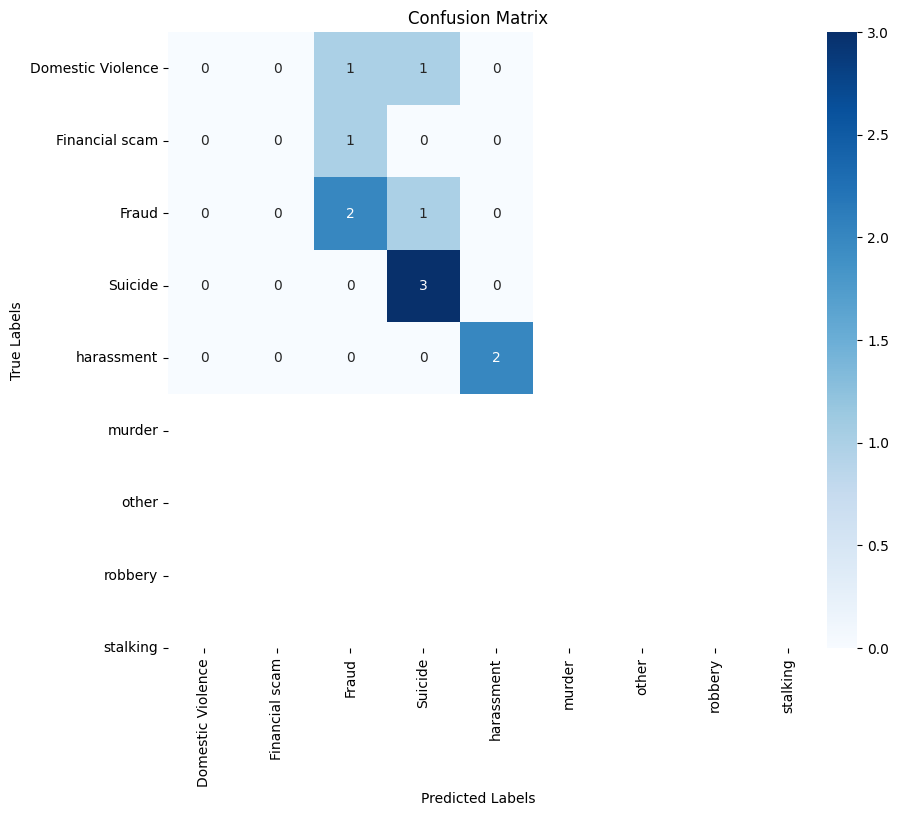

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Text Preprocessing (You may need to customize this based on your data)
# Convert text to lowercase
df['heading'] = df['heading'].str.lower()
df['content_summary'] = df['content_summary'].str.lower()



# Text Classification
# Define X and y
X = df['heading'] + ' ' + df['content_summary']
y = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Support Vector Classifier (SVM) as the model
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the categories of testing data
y_pred = svm_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
df

,id,heading,content_summary,article_link,img_link,month_date,time,Year,category
0,100,uttarakhand: man 39 held for killing constabl...,nainital district police on monday arrested a...,https://timesofindia.indiatimes.com/city/dehra...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,09:55,2022,murder
1,101,nashik city: another theft from parked car se...,thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/nashi...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,08:25,2022,robbery
2,102,uttarakhand: man 39 held for killing constabl...,nainital district police on monday arrested a...,https://timesofindia.indiatimes.com/city/pune/...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,09:55,2022,murder
3,103,nashik city: another theft from parked car se...,thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/patna...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,08:25,2022,robbery
4,104,nashik city: another theft from parked car se...,thefts from parked cars continues in the city...,https://timesofindia.indiatimes.com/city/pune/...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,08:25,2022,robbery
5,105,pune: externed criminal jumps from bus fearin...,an externed criminal died in the early hours ...,https://timesofindia.indiatimes.com/city/pune/...,https://statictoiimgcom/thumb/imgsize-123456ms...,08-Nov,05:17,2022,other
6,106,gaya woman burned alive on suspicion of witch...,a middle-aged woman was badly thrashed and bu...,https://timesofindia.indiatimes.com/city/pune/...,https://statictoiimgcom/thumb/imgsize-123456ms...,06-Nov,05:24,2022,murder
7,107,man held on charge of stalking in pune,a man (33) was arrested on tuesday from khed ...,https://timesofindia.indiatimes.com/city/luckn...,https://statictoiimgcom/thumb/imgsize-123456ms...,03-Nov,08:32,2022,stalking
8,108,pune: victims of two street robberies team up...,two victims of armed assault and back-to-back...,https://timesofindia.indiatimes.com/city/indor...,https://statictoiimgcom/thumb/imgsize-123456ms...,03-Nov,08:30,2022,robbery
9,109,"madhya pradesh: four-year-old raped, abandoned...",a four-year-old girl was abducted from a hut a...,https://timesofindia.indiatimes.com/city/indor...,https://static.toiimg.com/thumb/imgsize-123456...,01-11-2001,14:44:00,2022,harassment


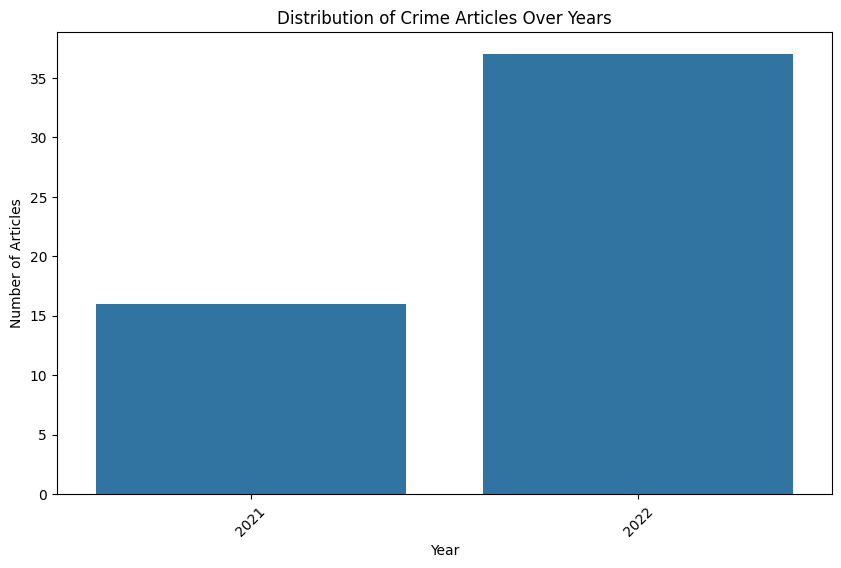

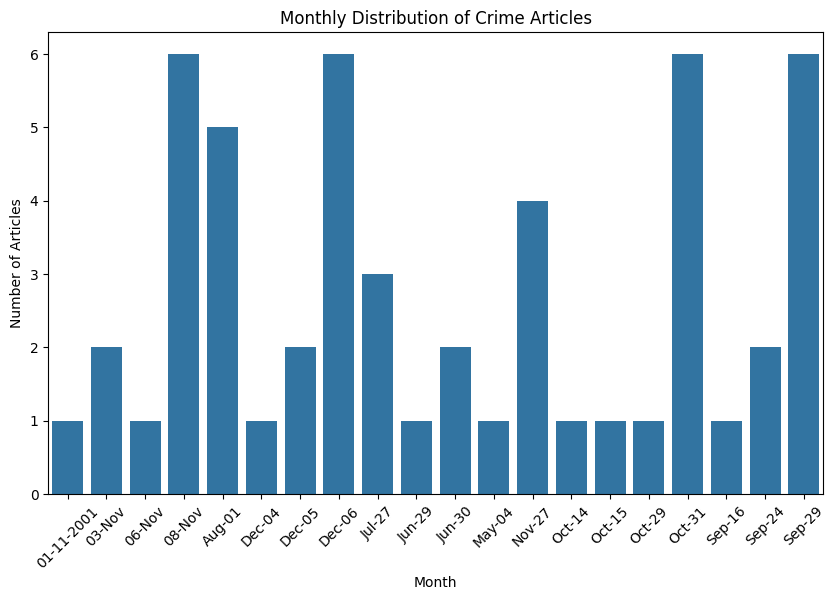

In [ ]:
# Exploratory Data Analysis (EDA)
# Distribution of crime articles over years
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Year'], data=df)
plt.title('Distribution of Crime Articles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
# Temporal Analysis
# Analyze the frequency of crime articles by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month_date', data=df, order=sorted(df['month_date'].unique()))
plt.title('Monthly Distribution of Crime Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

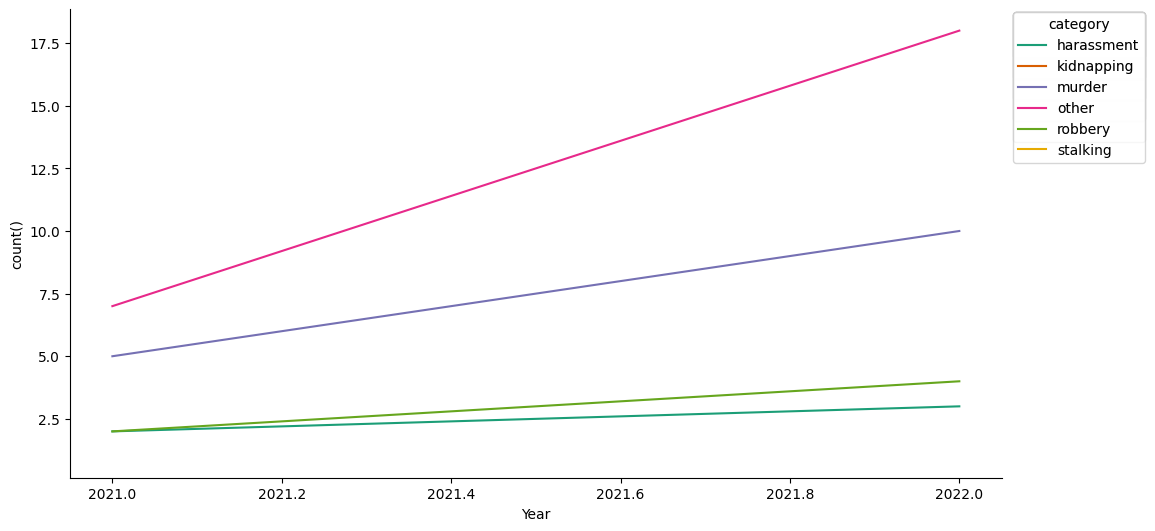

In [ ]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

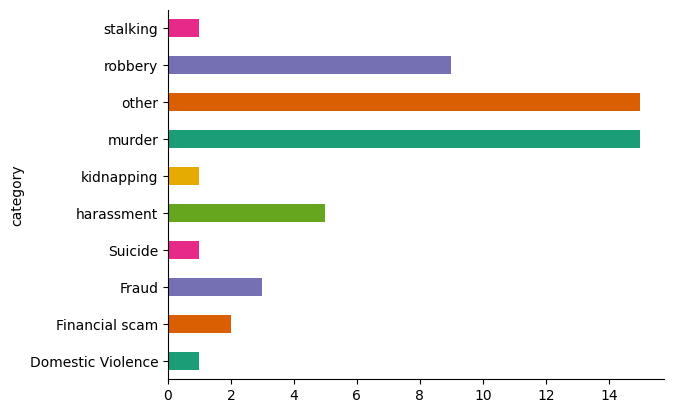

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

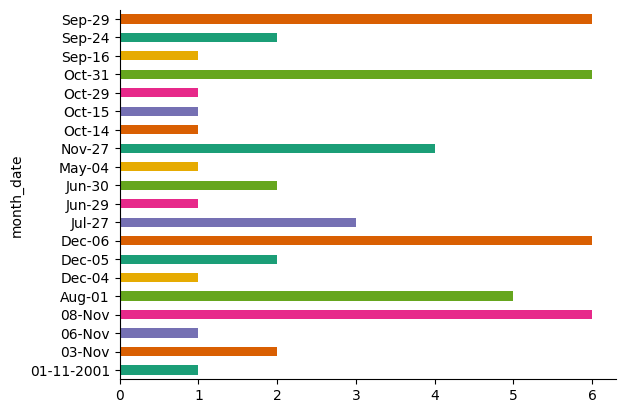

In [ ]:
# @title month_date

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('month_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

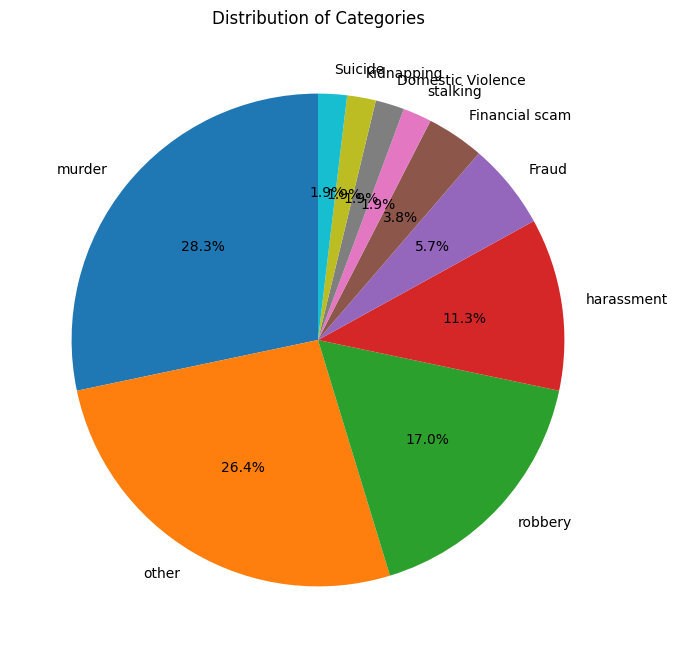

In [ ]:
import matplotlib.pyplot as plt
# Group by 'category' and count occurrences
category_counts = df['category'].value_counts()

# Plotting pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title("Distribution of Categories")
plt.ylabel('')
plt.show()

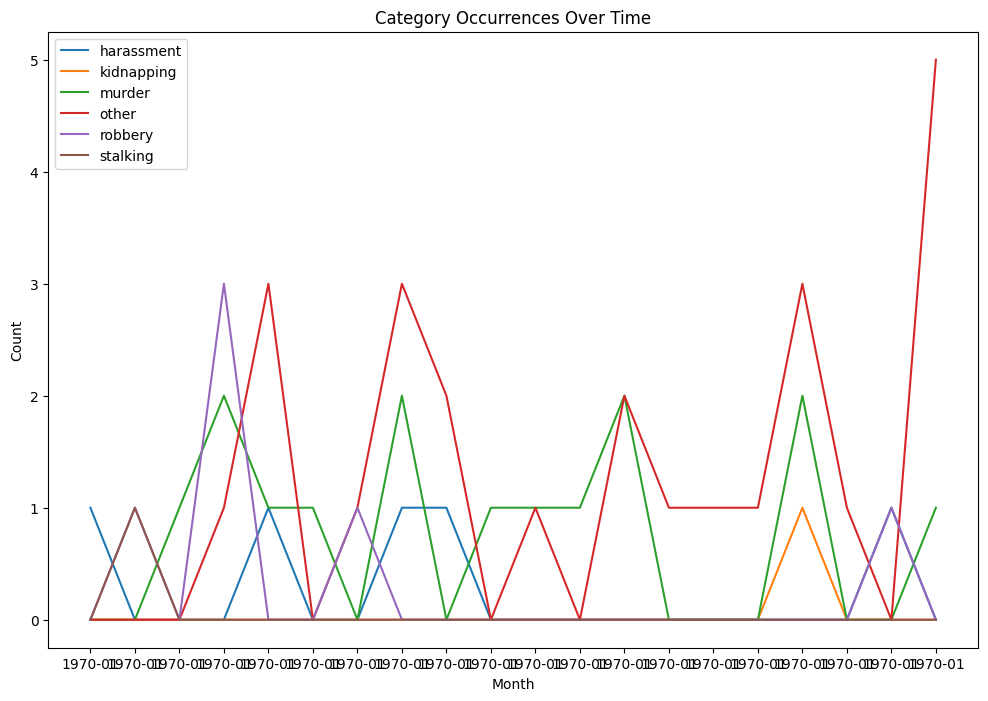

In [ ]:
import matplotlib.pyplot as plt
# Group by 'month_date' and 'category' and count occurrences
grouped_data = df.groupby(['month_date', 'category']).size().unstack(fill_value=0)

# Plot the line graph
plt.figure(figsize=(12, 8))
for category in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[category], label=category)

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Category Occurrences Over Time')

# Add legend
plt.legend()

# Show plot
plt.show()

<Figure size 1000x600 with 0 Axes>

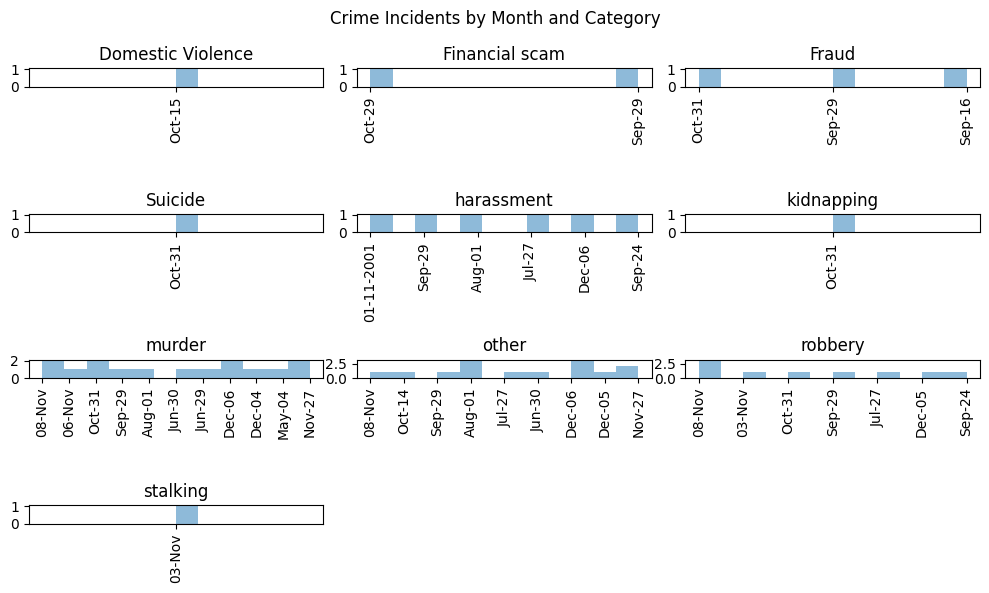

In [ ]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 6))
df['month_date'].hist(by=df['category'], bins=12, grid=False, alpha=0.5, figsize=(10, 6))

# Customize the plot
plt.suptitle('Crime Incidents by Month and Category')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

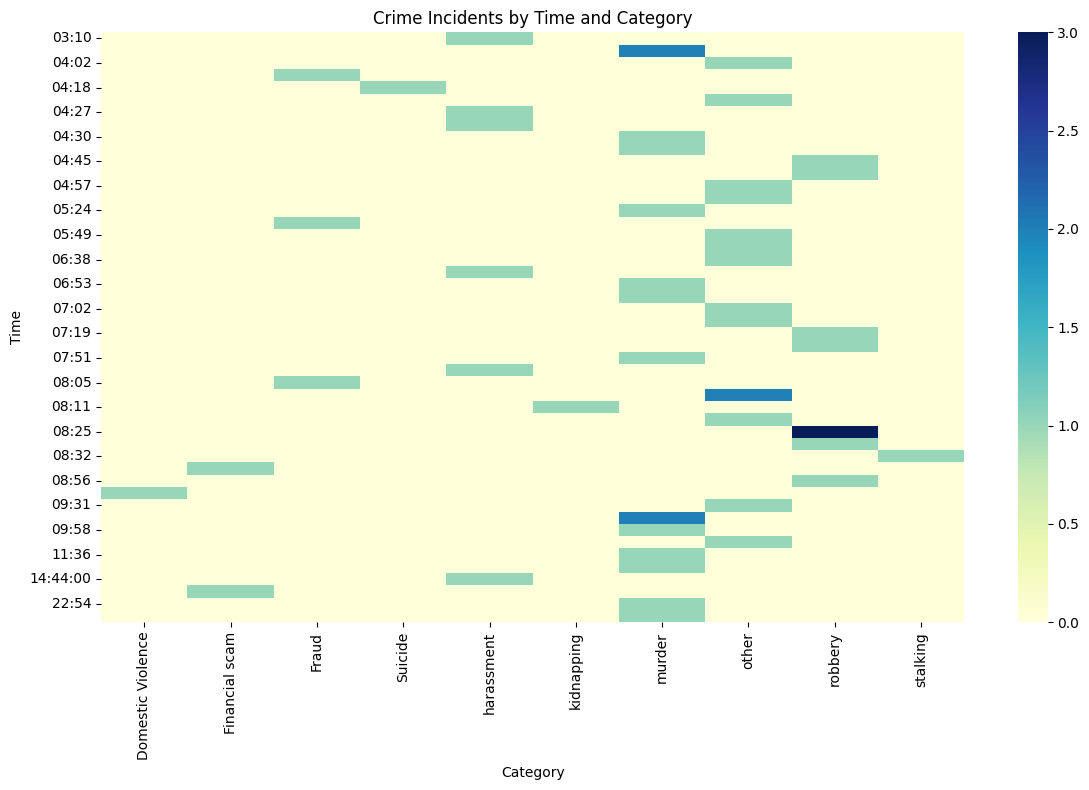

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(index='time', columns='category', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')

# Customize the plot
plt.title('Crime Incidents by Time and Category')
plt.xlabel('Category')
plt.ylabel('Time')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

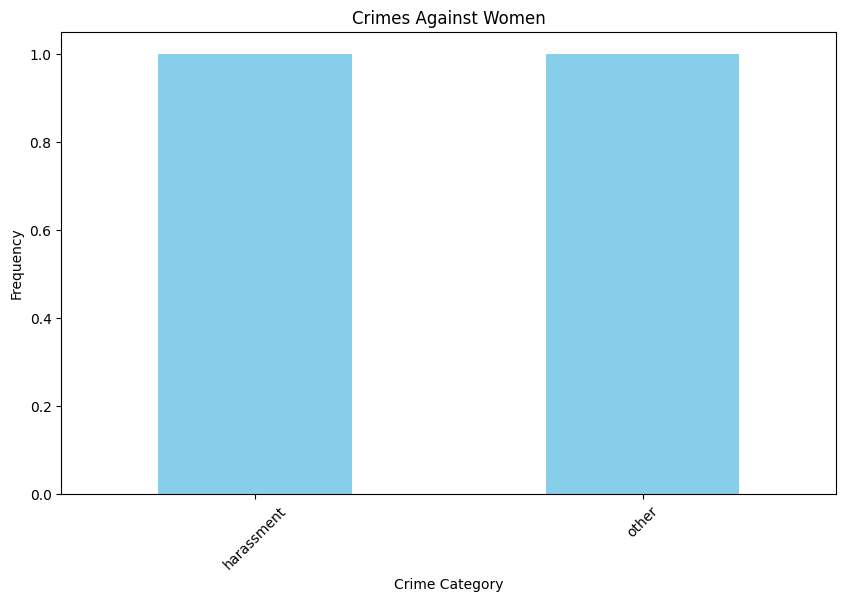

In [ ]:

import matplotlib.pyplot as plt



# Filter the dataset to include only articles related to crimes against women
crimes_against_women = df[df['heading'].str.contains('women', case=False)]

# Count the occurrences of each category of crimes against women
crime_categories_counts = crimes_against_women['category'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
crime_categories_counts.plot(kind='bar', color='skyblue')
plt.title('Crimes Against Women')
plt.xlabel('Crime Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
